In [1]:
import pennylane as qml
from pennylane import numpy as np

import sys
sys.path.append("../")
from Ising_circuit_4qubits import Ising

import matplotlib.pyplot as plt

## Entanglement entropy


For a pure state (ie the full 4-qubit system), the entanglement between a subregion ($A$) and the rest of the chain is given by the von Neumann entropy of the reduced density matrix ($\rho_A$).

$$S_A = - \mathrm{Tr}\!\left( \rho_A \log \rho_A \right)$$

In [2]:
n_qubits = 4
dev = qml.device("default.qubit", wires = n_qubits)
@qml.qnode(dev)
def gs_EE(h, subregion):
    Ising(h)
    return qml.vn_entropy(wires = subregion)

## Half chain 

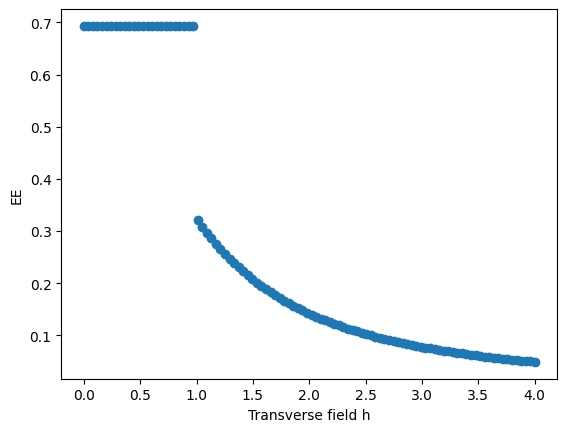

0.693147180559947

In [3]:
#half block (trace out the last two qubits)
#The EE should scale with L until the critical point where it will scale with log(L) because of the diverging correlation length
h_values = np.linspace(0, 4, 100)
EE_arr = []
for h in h_values:
    EE = gs_EE(h, [0,1])
    EE_arr.append(EE)
    
#plt.scatter(h_values, bog_EE_arr)
plt.scatter(h_values, EE_arr)
plt.ylabel("EE")
plt.xlabel("Transverse field h")
plt.show()

max(EE_arr) #Looks like its maximally entangled (S_A = ln(2)) until h = 1

## Different subregion sizes

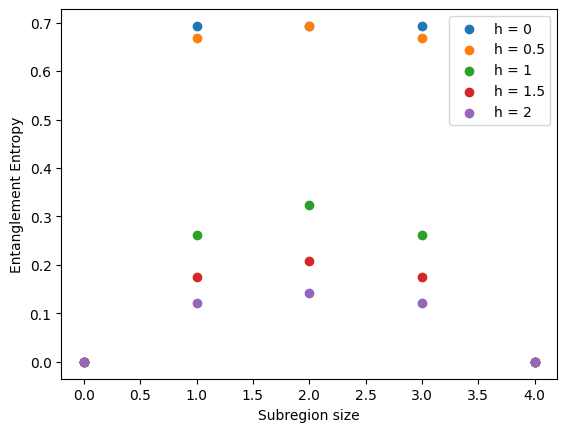

In [4]:
h_values = [0, 0.5, 1, 1.5, 2]
sizes = [[], [0], [0,1], [0,1,2], [0,1,2,3]]  # subregions
L = 4  # total system size (adjust if needed)

for h in h_values:
    EE = np.array([0 if len(s) in (0, 4) else gs_EE(h, s) for s in sizes]) #hardcode that its 0 for empty subregion A
    subregion_sizes = [len(s) for s in sizes]

    plt.scatter(subregion_sizes, EE, label=f"h = {h}")

plt.xlabel("Subregion size")
plt.ylabel("Entanglement Entropy")
plt.legend()
plt.show()


In [ ]:
#See discussion in https://physics.stackexchange.com/questions/401125/understanding-entanglement-entropy-in-the-transverse-field-ising-model